In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from gb import GrangerBusca,simulate,gbio

### Reading Data

In [51]:
#ticks.dat contains a sample of the memetracker dataset, the fitting method accepts a list of lists of ordered timestamps
timestamps=[]
with open('ticks.dat') as data:
    for l in data:
        timestamps.append([float(x) for x in l.split()[1:]])


### Fitting Data

In [52]:
granger_model = GrangerBusca(alpha_prior=1.0/len(timestamps), num_iter=300, metropolis=True, beta_strategy=1) #recommended parameters
granger_model.fit(timestamps)

{0: 120699, 1: 119701, 2: 119706, 3: 119700, 4: 121052, 5: 121076, 6: 121335, 7: 119700}
{0: array([ 0, 26, 40, 12, 42], dtype=uint64), 1: array([36,  2, 21, 30,  8, 50, 53, 51, 58, 57, 64, 55], dtype=uint64), 2: array([34, 33, 25, 22, 31, 49, 46, 48, 56], dtype=uint64), 3: array([29, 19,  7, 16, 17, 47, 44, 54, 10, 52, 59, 66, 60, 63], dtype=uint64), 4: array([35, 41, 28,  5,  4, 32], dtype=uint64), 5: array([ 6, 38, 20, 24, 39,  1], dtype=uint64), 6: array([14,  3, 13, 37, 15, 23], dtype=uint64), 7: array([ 9, 43, 27, 18, 11, 45, 68, 67, 61, 65, 62], dtype=uint64)}


### Saving and loading the model

In [54]:
gbio.save_model('example_model.npz',granger_model)
loaded_model=gbio.load_model('example_model.npz')

### Extracting the normalized Granger Matrix and the Exogeneous rates vector

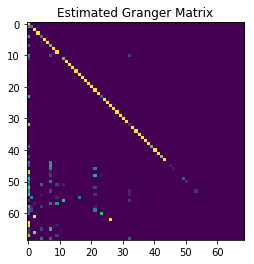

Exogeneous rates vector
[  7.26410606e-03   4.86883319e-04   9.39243307e-04   4.61040749e-04
   7.10645219e-04   4.34545427e-04   4.88851532e-04   2.40845499e-03
   5.31023388e-04   8.38023251e-04   0.00000000e+00   8.58880382e-04
   2.58922166e-04   4.55504940e-04   4.87032571e-04   5.31761243e-04
   6.93030726e-04   4.57584871e-04   4.11417451e-04   4.44693905e-04
   4.74058113e-04   1.49506602e-03   4.30788728e-04   4.38024896e-04
   2.58340646e-04   3.56441237e-04   7.02011656e-04   4.61662223e-04
   2.81408538e-04   5.34910173e-04   3.92344311e-04   3.81105820e-04
   4.39323815e-04   4.61192725e-04   5.01210043e-04   4.94643789e-04
   4.98753490e-04   3.81085886e-04   6.40264785e-04   3.91179738e-04
   4.56211203e-04   2.28336099e-04   3.10917668e-04   4.50753413e-04
   0.00000000e+00   5.61325149e-05   3.28878181e-05   0.00000000e+00
   0.00000000e+00   1.06404007e-04   7.41617106e-05   0.00000000e+00
   0.00000000e+00   4.41810004e-05   0.00000000e+00   0.00000000e+00
   0.00000

In [55]:
G=preprocessing.normalize(granger_model.Alpha_.toarray(),"l1")
mu=granger_model.mu_
plt.imshow(G)
plt.title('Estimated Granger Matrix')
plt.show()
print('Exogeneous rates vector')
print(mu)

### Simulating a Granger-Busca process

In [56]:
G_sim=np.ones((5,5)) / 5
Beta_sim=np.ones((5,5))
mu_sim=0.01*np.ones((5))

T_sim=1000
sim = simulate.GrangeBuscaSimulator(mu_sim, G_sim,Beta_sim)
sim_timestamps = sim.simulate(T_sim)

In [ ]:
counting = [np.arange(len(sim_timestamps[i])) for i in range(len(sim_timestamps))]
for i in range(len(sim_timestamps)):
    plt.plot(sim_timestamps[i], counting[i], label='%d' % i)
plt.legend()
plt.ylabel('$N(t)$' , labelpad=0)
plt.xlabel('t' , labelpad=0)
plt.show()